# Diseases Classification ML Project

### **THIS IS A DRAFT NOTEBOOK**

In this project we'll try to identify the client's disease by his sympthoms

## Data Engineering

In [ ]:
import seaborn as sns
import pydotplus

In [ ]:
import pandas as pd
import numpy as np

filepath = 'data/diseases_and_symptoms.csv'
data = pd.read_csv(filepath, sep=',')

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
data.shape

(4962, 133)

In [ ]:
data.drop_duplicates().shape

(305, 133)

We found that out of 4962 records, there are only 305 unique ones, which means that each record exists 16 times on average,

### It will make it difficult to predict the test data set, because it will be contained in the training data set!

In [ ]:
data.dtypes.value_counts()

int64     132
object      1
dtype: int64

In [ ]:
data['prognosis'].value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

Removing the predict column from the feature columns list

In [ ]:
feature_columns = [x for x in data.columns if x != 'prognosis']
feature_columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [ ]:
data.nunique().sort_values(ascending=True)

fluid_overload                   1
itching                          2
irritability                     2
depression                       2
toxic_look_(typhos)              2
                                ..
pain_behind_the_eyes             2
loss_of_appetite                 2
nausea                           2
blurred_and_distorted_vision     2
prognosis                       41
Length: 133, dtype: int64

All features have 1 or 2 values.

Deleting אhe feature with 1 value:

In [ ]:
feature_columns = [x for x in feature_columns if x != 'fluid_overload']

Checking that all the features are 0 or 1

In [ ]:
print((data.loc[:,feature_columns].min()>=0).all())
print((data.loc[:,feature_columns].max()<=1).all())

True
True


Converting all the features to boolean

In [ ]:
for col in feature_columns:
    data[col] = data[col].astype('bool')
     
data[feature_columns].head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Correlation values

In [ ]:
corr_values = data[feature_columns].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

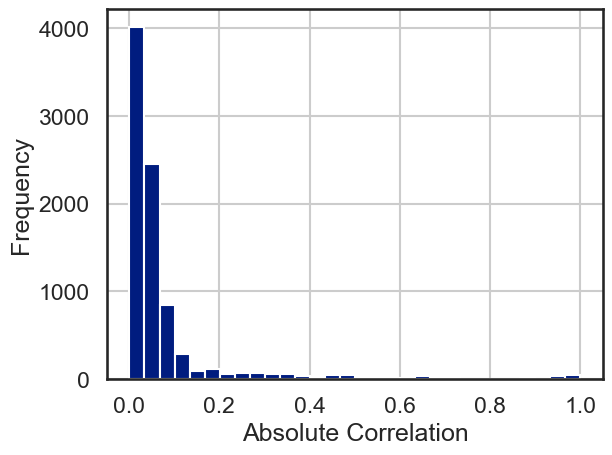

In [ ]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=30)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

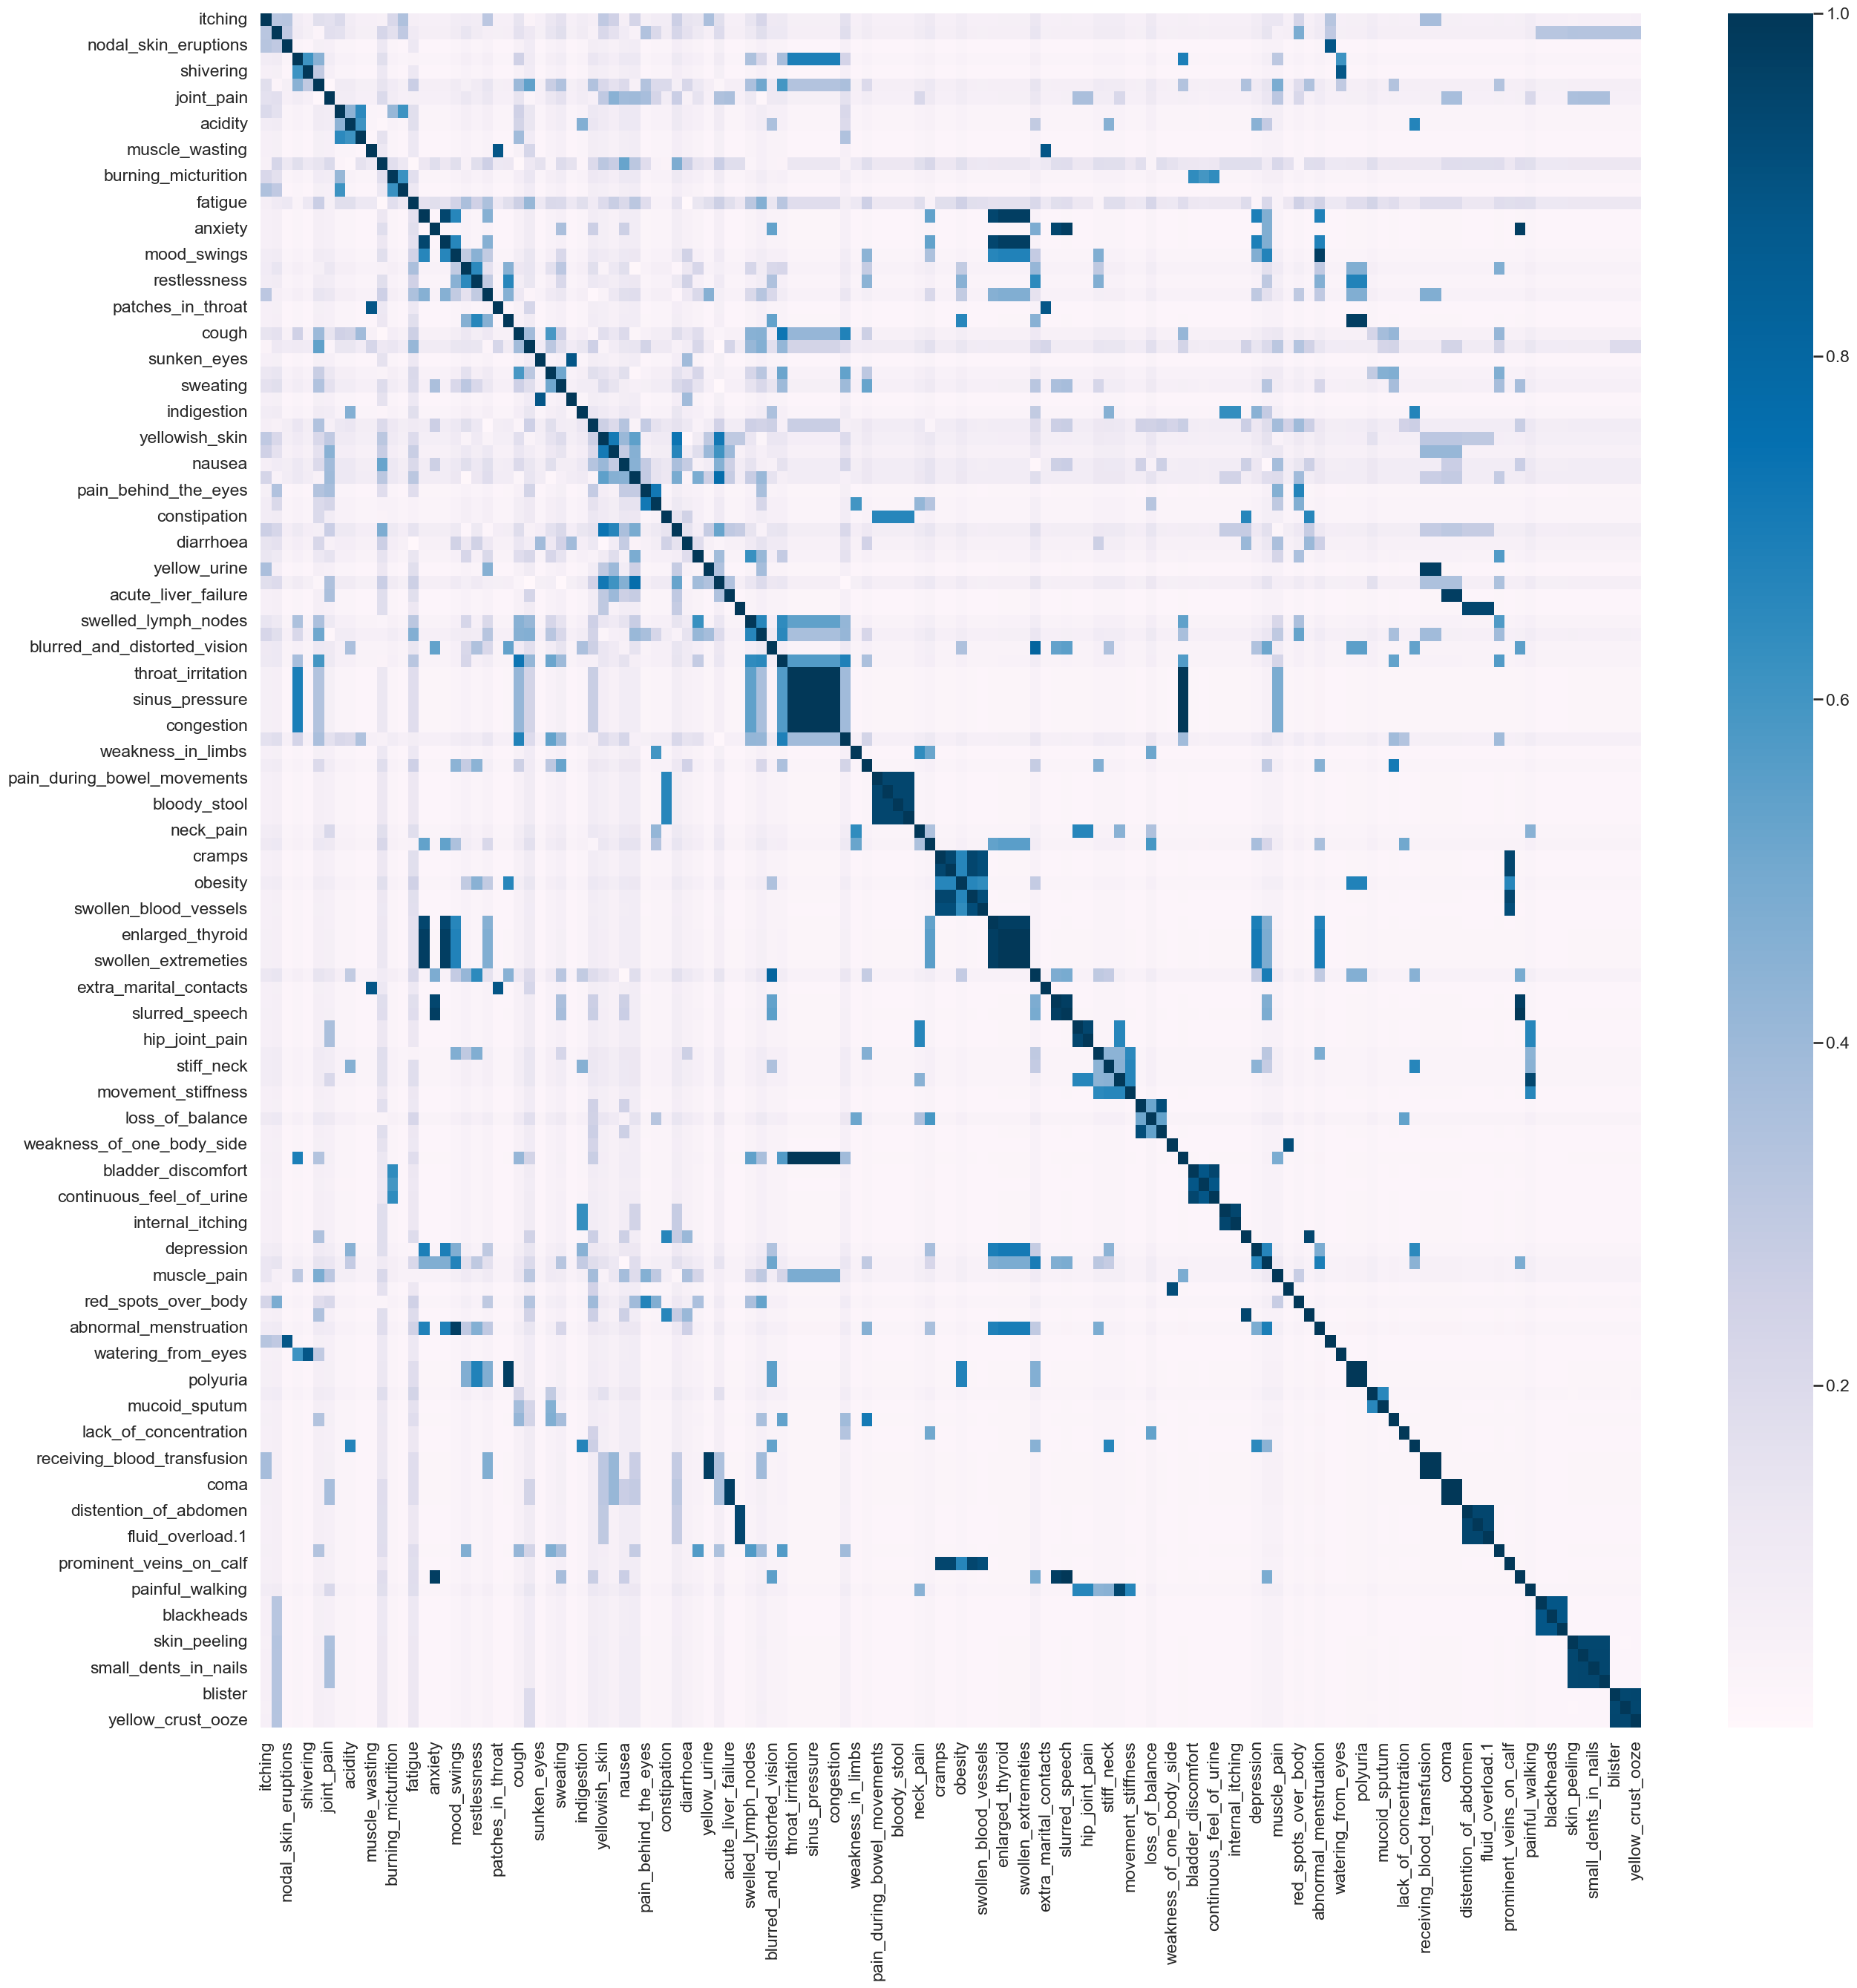

In [ ]:
data_corr = data.corr()

plt.figure(figsize = (30, 30))
sns.heatmap(data[feature_columns].corr().abs(), cmap = 'PuBu', annot = False)
plt.show()

The most highly correlated values

In [ ]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation > 0.95')

,feature1,feature2,correlation,abs_correlation
5621,congestion,loss_of_smell,1.000000,1.000000
6745,brittle_nails,swollen_extremeties,1.000000,1.000000
7072,slurred_speech,palpitations,1.000000,1.000000
5434,sinus_pressure,runny_nose,1.000000,1.000000
5357,redness_of_eyes,congestion,1.000000,1.000000
5435,sinus_pressure,congestion,1.000000,1.000000
5275,throat_irritation,redness_of_eyes,1.000000,1.000000
5276,throat_irritation,sinus_pressure,1.000000,1.000000
5277,throat_irritation,runny_nose,1.000000,1.000000
8137,increased_appetite,polyuria,1.000000,1.000000


In [ ]:
upper_tri = data_corr.where(np.triu(np.ones(data_corr.shape),k=1).astype(np.bool))
print(upper_tri)

                      itching  skin_rash  nodal_skin_eruptions  \
itching                   NaN   0.319331              0.326653   
skin_rash                 NaN        NaN              0.298366   
nodal_skin_eruptions      NaN        NaN                   NaN   
continuous_sneezing       NaN        NaN                   NaN   
shivering                 NaN        NaN                   NaN   
...                       ...        ...                   ...   
small_dents_in_nails      NaN        NaN                   NaN   
inflammatory_nails        NaN        NaN                   NaN   
blister                   NaN        NaN                   NaN   
red_sore_around_nose      NaN        NaN                   NaN   
yellow_crust_ooze         NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.087017  -0.059977 -0.176110   -0.160836   
skin_rash                       -0.094901  -0.06541

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'slurred_speech', 'loss_of_smell', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'palpitations']


In [ ]:
feature_columns = [x for x in feature_columns if x not in to_drop]

data[feature_columns].head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.feature_selection import VarianceThreshold

data_temp=data[feature_columns]

sel = VarianceThreshold(threshold=0.03)
sel.fit(data_temp)

sel.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [ ]:
data[feature_columns].head()
data_temp.columns[sel.get_support()]

Index(['itching', 'skin_rash', 'continuous_sneezing', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'vomiting', 'fatigue', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'cough', 'high_fever',
       'breathlessness', 'sweating', 'indigestion', 'headache',
       'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
       'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain',
       'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm', 'chest_pain',
       'fast_heart_rate', 'neck_pain', 'dizziness', 'obesity',
       'excessive_hunger', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
       'loss_of_balance', 'depression', 'irritability', 'muscle_pain',
       'red_spots_over_body', 'abnormal_menstruation', 'family_history',
       'painful_walking'],
      dtype='object')

In [ ]:
#feature_columns = [x for x in feature_columns if x not in data_temp.columns[sel.get_support()]]
data[feature_columns].head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Predict column handling

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])
noise_for_train['prognosis'] = encoder.fit_transform(noise_for_train['prognosis'])

In [ ]:
data['prognosis'].value_counts()

15    122
20    121
22    121
3     121
36    121
10    121
34    121
13    121
18    121
39    121
26    121
24    121
25    121
31    121
5     121
0     121
2     121
38    121
35    121
21    121
19    121
4     121
40    121
16    121
9     121
14    121
33    121
1     121
12    121
17    121
6     121
23    121
30    121
7     121
32    121
28    121
29    121
8     121
11    121
37    121
27    121
Name: prognosis, dtype: int64

Add noise to the training data set

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random

uniq_prognosis = data['prognosis'].unique()

noise_for_train = pd.DataFrame(columns=data.columns)
for i in range(100):
    row = {}
    for col in feature_columns:
        row[col] =  bool(random.getrandbits(1))
        row['prognosis'] = random.choice(uniq_prognosis)
    noise_for_train = noise_for_train.append(row, ignore_index=True)
noise_for_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,True,False,True,True,True,True,True,True,False,True,...,False,False,False,True,True,True,False,False,False,Hyperthyroidism
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,Heart attack
2,True,True,True,True,False,False,True,False,True,False,...,False,True,False,False,True,True,False,True,True,Hyperthyroidism
3,False,False,False,True,True,True,False,False,True,False,...,True,False,True,True,True,False,False,False,False,Varicose veins
4,False,False,True,False,True,False,True,True,True,False,...,False,True,True,True,True,False,True,False,False,Tuberculosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,True,False,True,False,True,False,False,False,...,True,False,True,False,False,True,False,False,True,Varicose veins
96,True,True,True,True,True,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,Common Cold
97,False,False,False,False,True,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,Varicose veins
98,False,False,False,False,False,False,True,False,True,True,...,False,True,True,True,False,False,True,True,False,Malaria


Splitting the data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[feature_columns], data['prognosis'], test_size = 0.3, random_state=42,shuffle=True)

In [ ]:
y_train.value_counts(normalize=True)

31    0.027066
29    0.026778
13    0.026490
0     0.026490
15    0.025626
30    0.025626
26    0.025626
32    0.025626
14    0.025626
25    0.025626
12    0.025626
7     0.025338
8     0.025338
9     0.025338
10    0.025050
28    0.025050
4     0.025050
33    0.025050
23    0.024762
20    0.024187
5     0.024187
39    0.024187
16    0.024187
18    0.024187
35    0.023899
38    0.023899
40    0.023899
2     0.023611
17    0.023611
36    0.023611
11    0.023323
27    0.023323
37    0.023035
22    0.023035
6     0.022747
19    0.022747
3     0.022747
21    0.022747
1     0.022171
34    0.022171
24    0.021307
Name: prognosis, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

24    0.031565
34    0.029550
1     0.029550
19    0.028207
21    0.028207
6     0.028207
3     0.028207
37    0.027535
22    0.027535
27    0.026864
11    0.026864
17    0.026192
36    0.026192
2     0.026192
40    0.025520
35    0.025520
38    0.025520
39    0.024849
5     0.024849
18    0.024849
20    0.024849
16    0.024849
23    0.023506
4     0.022834
33    0.022834
28    0.022834
10    0.022834
8     0.022163
7     0.022163
15    0.022163
9     0.022163
32    0.021491
30    0.021491
12    0.021491
14    0.021491
25    0.021491
26    0.021491
13    0.019476
0     0.019476
29    0.018805
31    0.018133
Name: prognosis, dtype: float64

In [ ]:
x_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3176,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1650,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3734,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4580,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
1164,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4331,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Appending the noise to the train data

In [ ]:
x_train=pd.concat([x_train,noise_for_train[feature_columns]])
x_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3176,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1650,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3734,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,True,False,True,False,True,False,False,False,...,False,True,False,True,False,False,True,False,False,True
96,True,True,True,True,True,False,False,False,False,False,...,True,False,True,False,False,True,False,True,False,True
97,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,False,False,False,False,False,False
98,False,False,False,False,False,False,True,False,True,True,...,True,False,True,True,True,False,False,True,True,False


In [ ]:
y_train.shape

(3473,)

In [ ]:
y_train=pd.concat([y_train,noise_for_train['prognosis']])
y_train.shape

(3573,)

In [ ]:
x_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3176,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1650,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3734,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,True,False,True,False,True,False,False,False,...,False,True,False,True,False,False,True,False,False,True
96,True,True,True,True,True,False,False,False,False,False,...,True,False,True,False,False,True,False,True,False,True
97,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,False,False,False,False,False,False
98,False,False,False,False,False,False,True,False,True,True,...,True,False,True,True,True,False,False,True,True,False


In [ ]:
len(x_train.index)

3493

In [ ]:
len(x_test.index)

1489

In [ ]:
x_test.drop_duplicates()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4580,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
1164,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4331,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1788,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1786,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print (pd.merge(x_train,x_test, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))

       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
5541     False      False                 False                 True   
5542     False      False                 False                 True   
5543     False      False                 False                 True   
5544     False      False                 False                 True   
5545     False      False                 False                 True   
...        ...        ...                   ...                  ...   
50999     True       True                 False                False   
51000     True       True                 False                False   
51001     True       True                 False                False   
51002     True       True                 False                False   
51003     True       True                 False                False   

       shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
5541       False   False       False         False    

## Supervised classifiers

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

full_tree = DecisionTreeClassifier(random_state=42)
full_tree = full_tree.fit(x_train, y_train)

In [ ]:
full_tree.tree_.node_count, full_tree.tree_.max_depth

(337, 51)

In [ ]:
full_tree.fit(x_train, y_train)
print("Decision Tree Train score with ",format(full_tree.score(x_train, y_train)))

Decision Tree Train score with  1.0


In [ ]:
print("Decision Tree Test score with ",format(full_tree.score(x_test, y_test)))

Decision Tree Test score with  0.9993284083277367


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def multiple_measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='macro'),
                      'recall': recall_score(y_true, y_pred, average='macro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [ ]:
# The error on the training and test data sets
y_train_pred = full_tree.predict(x_train)
y_test_pred  = full_tree.predict(x_test)

train_test_full_error = pd.concat([multiple_measure_error(y_train, y_train_pred, 'train'),
                              multiple_measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.999328
precision,1.0,0.999283
recall,1.0,0.999261
f1,1.0,0.999328


Plotting the confusion matrix for full tree

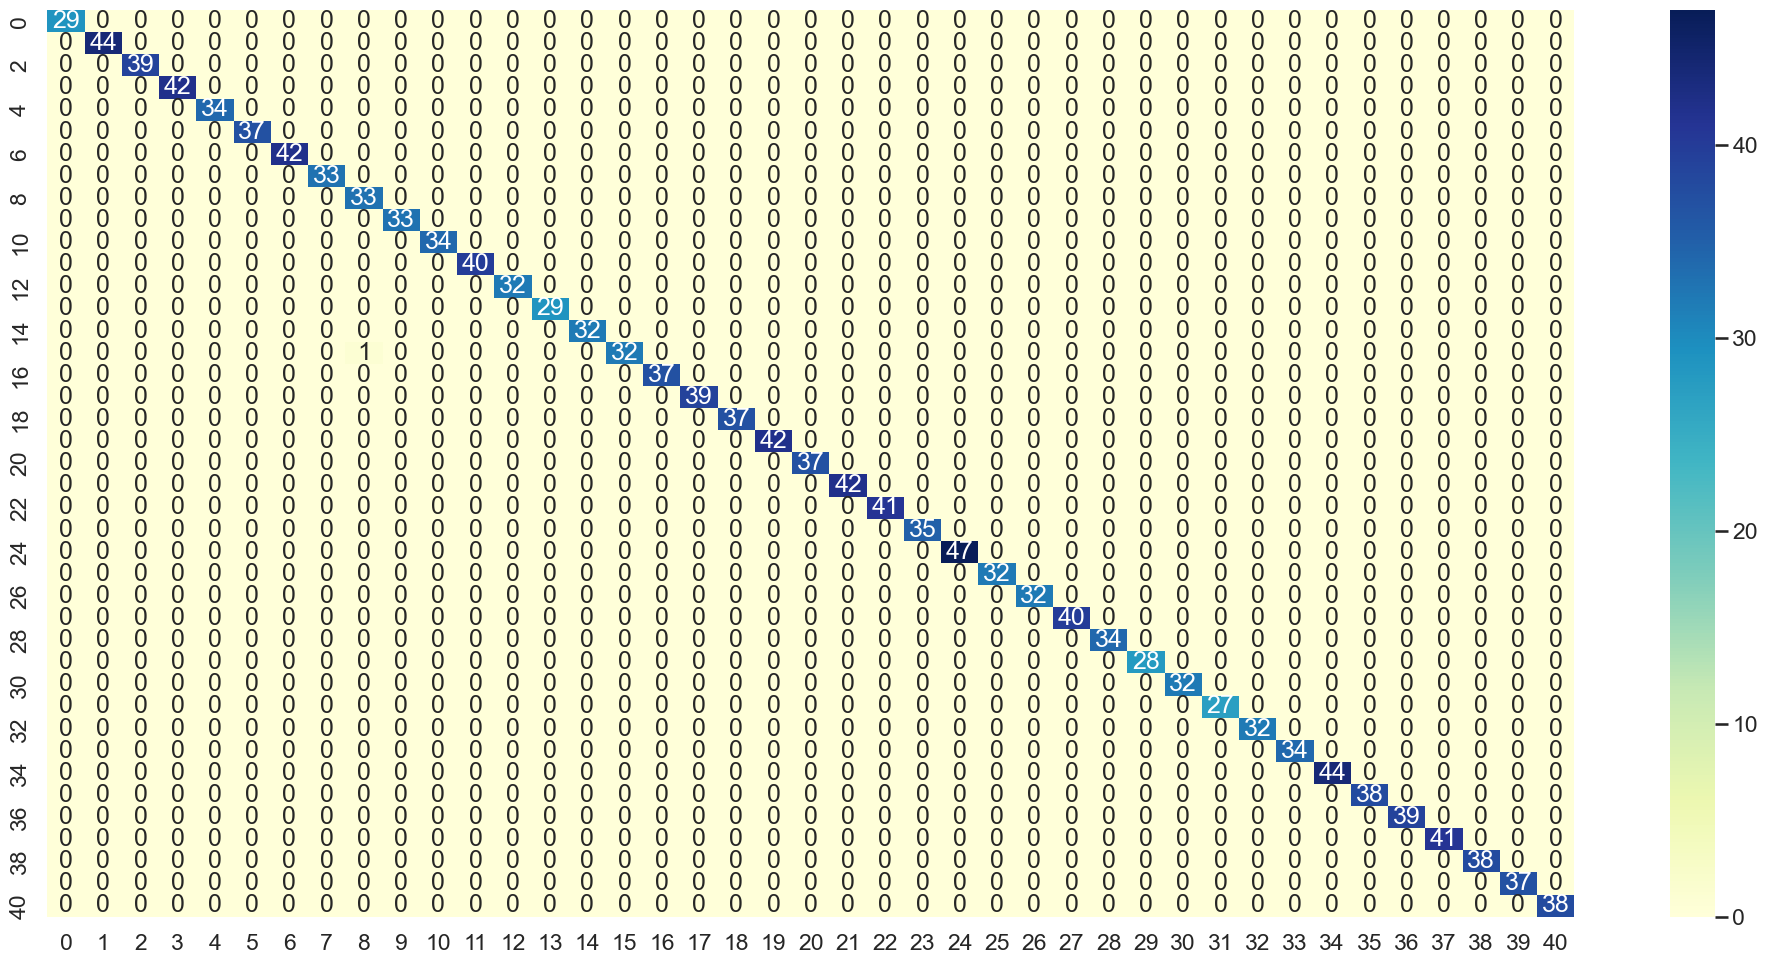

In [ ]:
from sklearn.metrics import confusion_matrix 

class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

In [ ]:
# dt_trim = DecisionTreeClassifier(max_depth=20,random_state=42)
# dt_trim = dt_trim.fit(x_train, y_train)

In [ ]:
# dt_trim.tree_.node_count, dt_trim.tree_.max_depth

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, full_tree.tree_.max_depth+1, 2),
              'max_features': range(1, len(full_tree.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)

In [ ]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(403, 39)

In [ ]:
y_train_pred_gr = GR.predict(x_train)
y_test_pred_gr = GR.predict(x_test)

train_test_gr_error = pd.concat([multiple_measure_error(y_train, y_train_pred_gr, 'train'),
                                 multiple_measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

train_test_gr_error

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0


Plotting the confusion matrix for the grid search tree

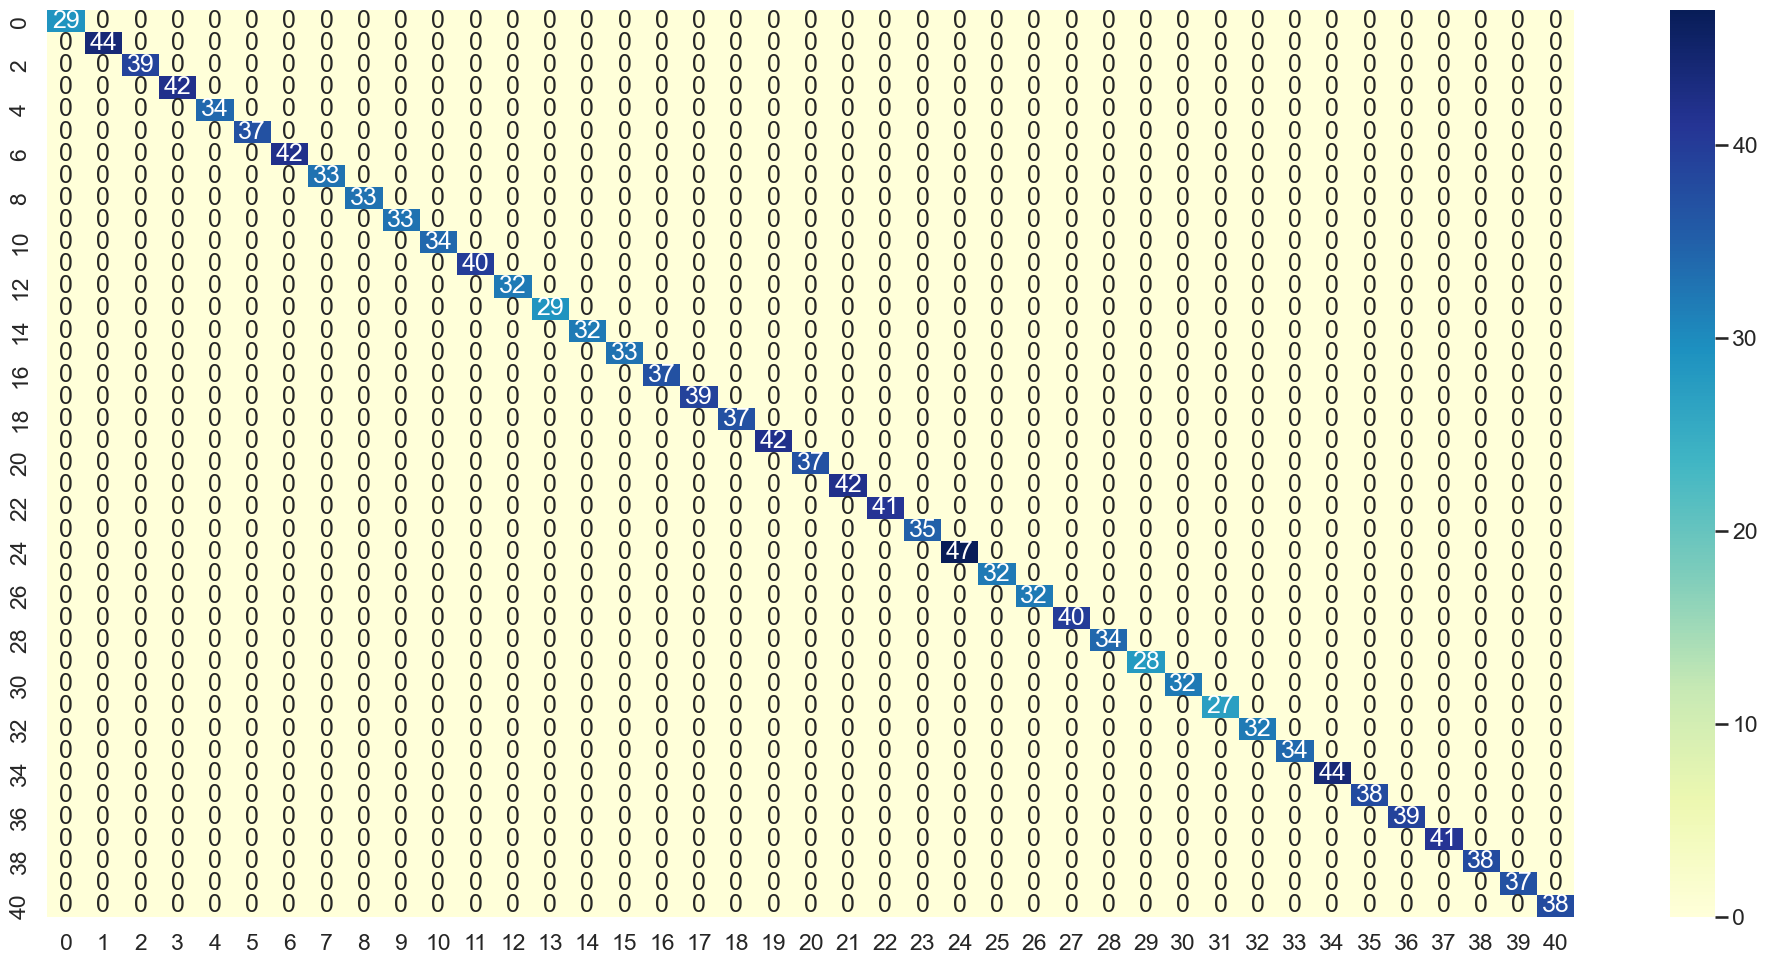

In [ ]:
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
cm = confusion_matrix(y_test, y_test_pred_gr)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
rf.fit(x_train, y_train)
y_test_pred_rf=rf.predict(x_test)
y_train_pred_rf=rf.predict(x_train)

print("Random Forest Train score with ",format(rf.score(x_train, y_train)))

Random Forest Train score with  0.9974811083123426


In [ ]:
train_test_rf_error = pd.concat([multiple_measure_error(y_train, y_train_pred_rf, 'train'),
                                 multiple_measure_error(y_test, y_test_pred_rf, 'test')],
                                axis=1)

train_test_rf_error

,train,test
accuracy,0.997481,0.997985
precision,0.997869,0.997713
recall,0.997313,0.998266
f1,0.997481,0.997985


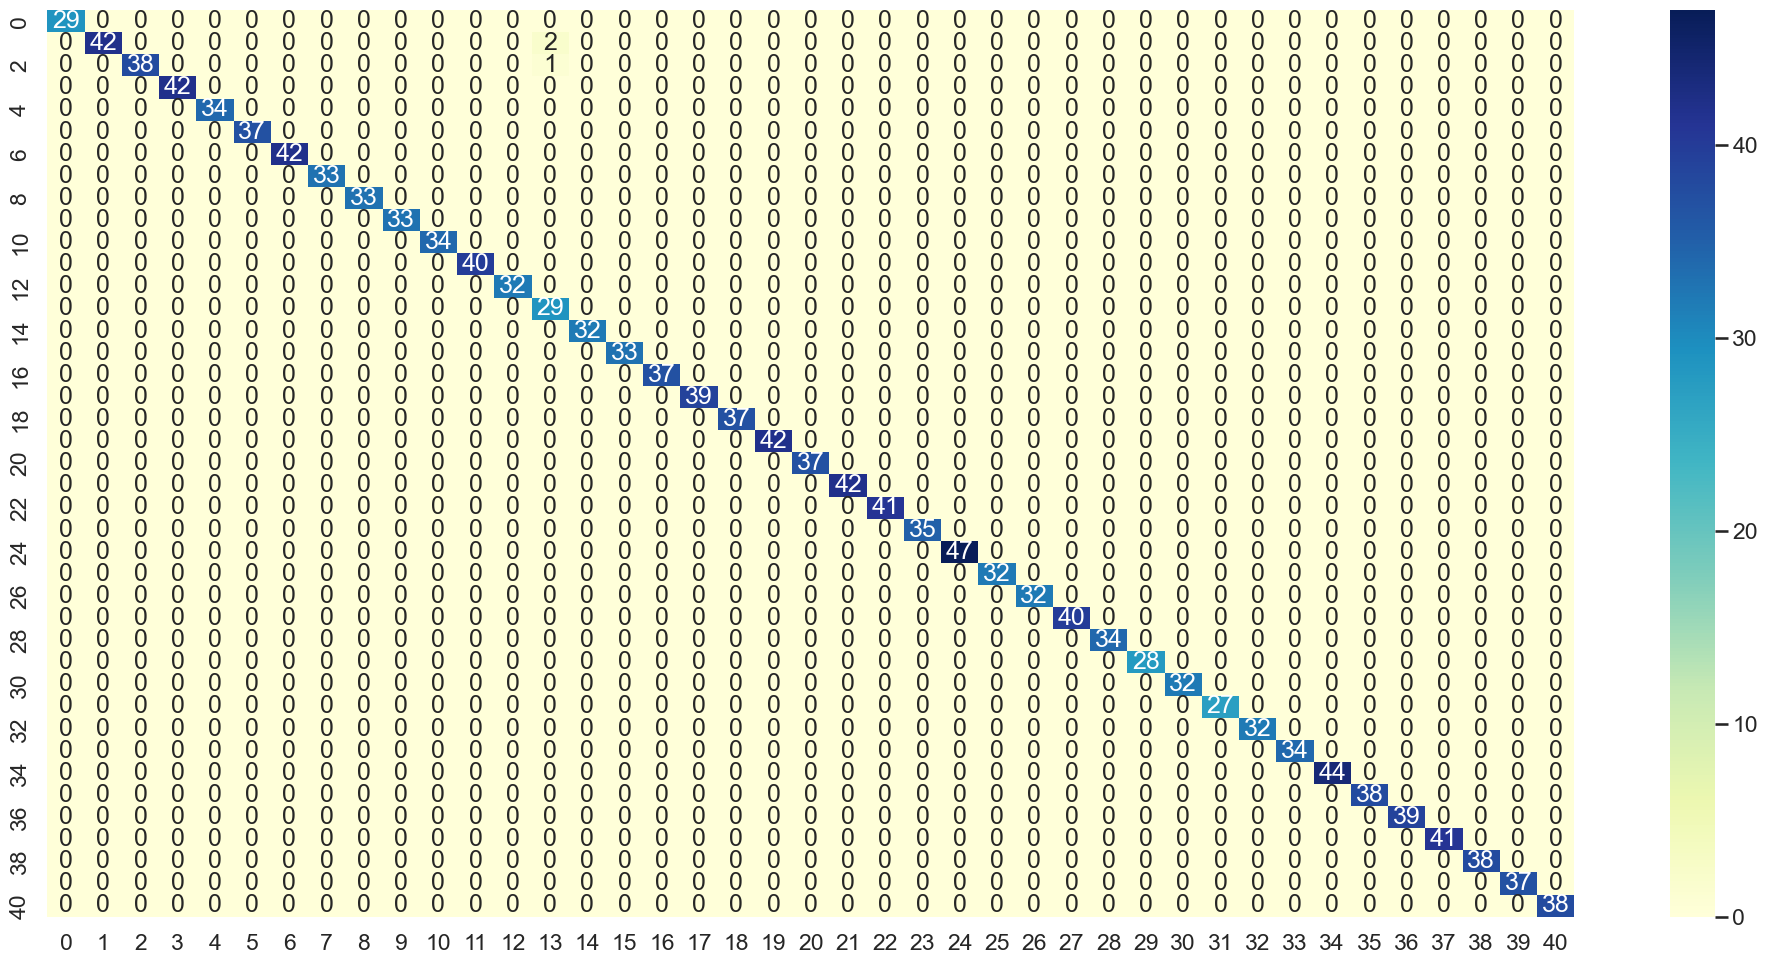

In [ ]:
#confusion matrix for random forest

class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

In [ ]:
# from io import StringIO
# from IPython.display import Image, display
# from sklearn.tree import export_graphviz
# import pydotplus

    
# # Create an output destination for the file
# dot_data = StringIO()

# export_graphviz(rf, out_file=dot_data, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# print(graph)
# # View the tree image
# filename = 'rf_tree.png'
# graph.write_png(filename)
# img = Image(filename=filename)
# display(img)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.029387
20.0,0.027428
30.0,0.027428
40.0,0.027428
50.0,0.027428
100.0,0.027148
150.0,0.027148
200.0,0.027148
300.0,0.027428


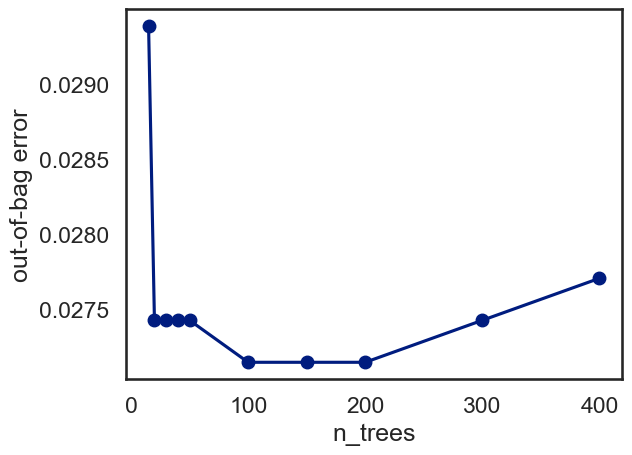

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(x_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.029387,0.029107
20.0,0.027428,0.027988
30.0,0.027428,0.026868
40.0,0.027428,0.027708
50.0,0.027428,0.027988
100.0,0.027148,0.027708
150.0,0.027148,0.027148
200.0,0.027148,0.026868
300.0,0.027428,0.027148


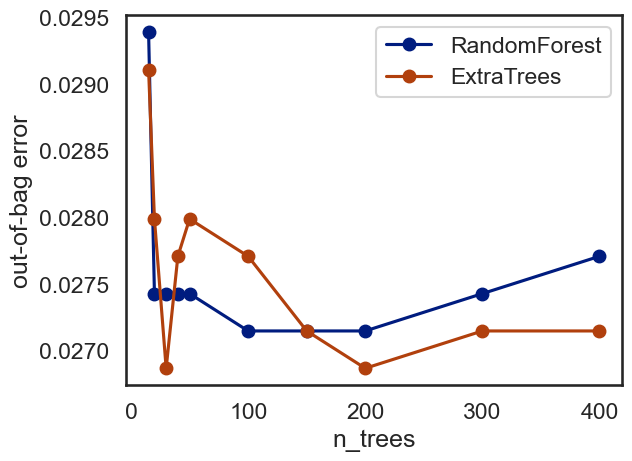

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

In [ ]:
# Extra random forest with 30 estimators
model = RF.set_params(n_estimators=50)

y_pred_ef = model.predict(x_test)

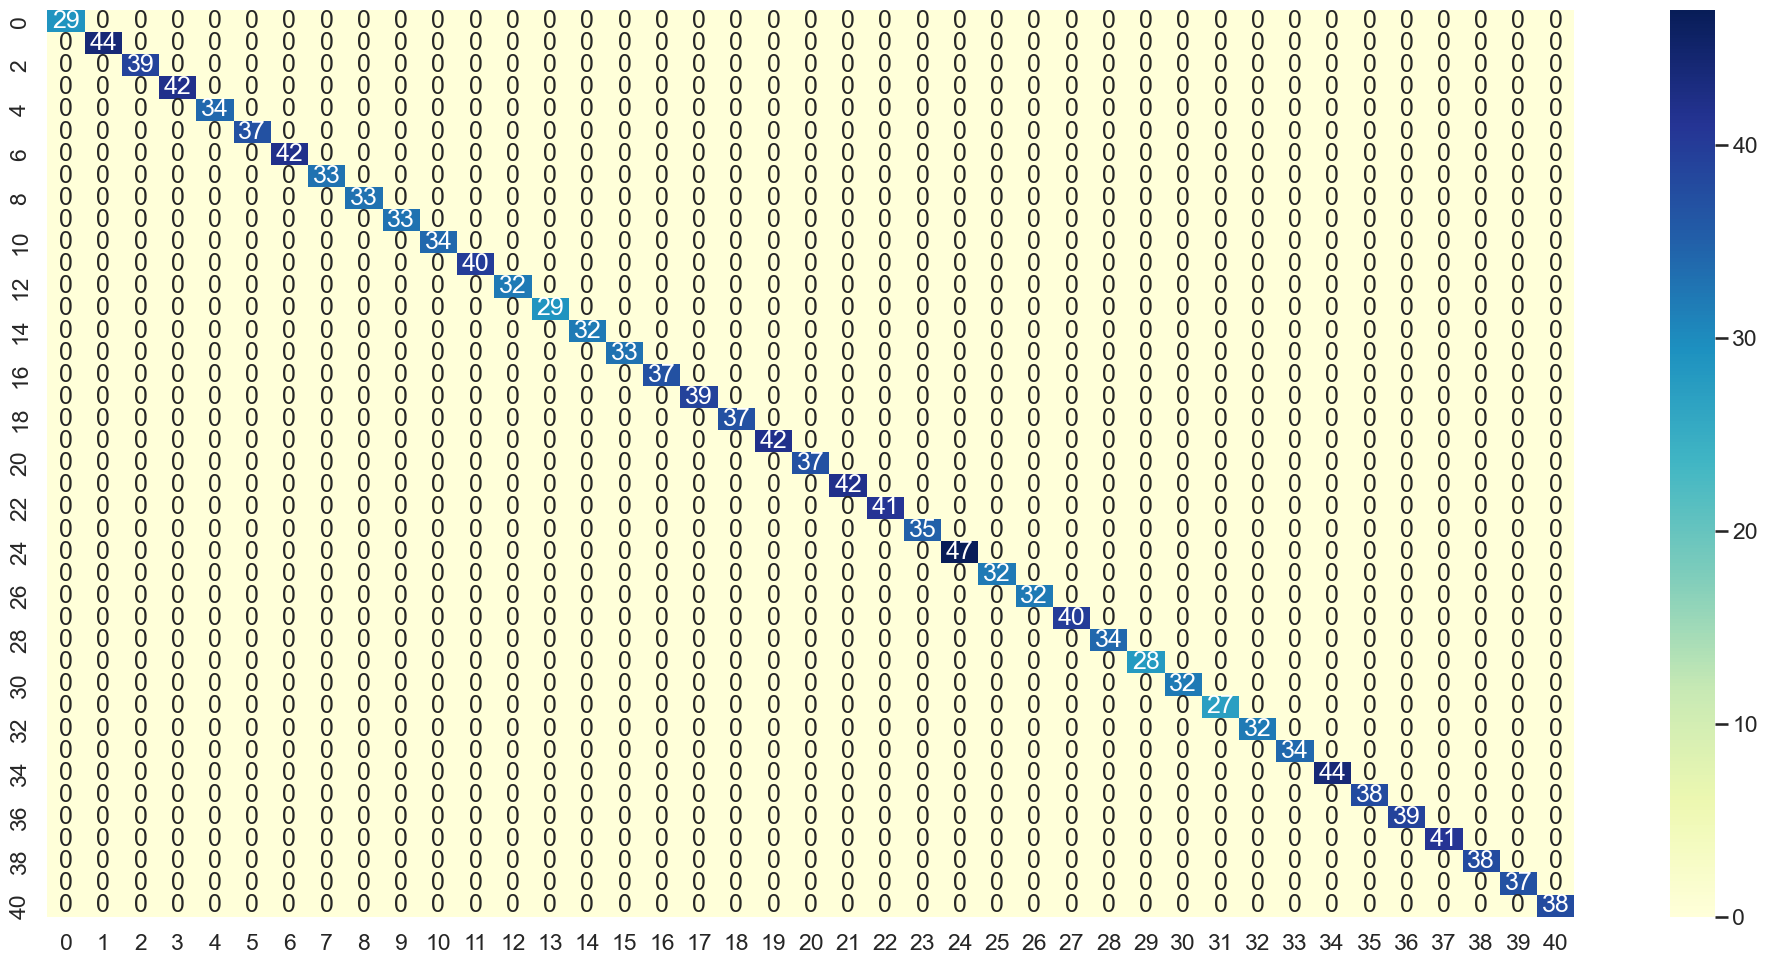

In [ ]:
#confusion matrox

class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_array = []
for k in range (1,20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(x_train, y_train)
  y_knn_pred = knn.predict(x_test)

  accuracy_array.append((k, accuracy_score(y_test, y_knn_pred)))

accuracy_df = pd.DataFrame(accuracy_array, columns=['k', 'accuracy'])

accuracy_df

,k,accuracy
0,1,1.000000
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000


logistic regression

In [ ]:

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(x_train, y_train)

y_pred_logr = logr.predict(x_test)

accuracy_score(y_test, y_pred_logr)

1.0

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
logr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(x_train, y_train)

y_pred_logr_l1 = logr_l1.predict(x_test)

accuracy_score(y_test, y_pred_logr_l1)

0.9993284083277367

In [ ]:
# L2 regularized logistic regression
logr_l1_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(x_train, y_train)

y_pred_logr_l2 = logr_l1_l2.predict(x_test)

accuracy_score(y_test, y_pred_logr_l2)

1.0

## Conclusion:

Because of out of 4962 records there are only 305 unique ones, the test data set is contained in the training data set and every model will be overfitted.